<a href="https://colab.research.google.com/github/Picassop/Electronic-Nose-/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/VOC_collab.csv")

In [ ]:
df.columns

Index(['ppmlevels(CO)', 'sensorvoltagevalue(CO)', 'ppmlevels(Alcohol)',
       'sensorvoltagevalue(Alcohol)', 'Class'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ppmlevels(CO)                363 non-null    float64
 1   sensorvoltagevalue(CO)       363 non-null    float64
 2   ppmlevels(Alcohol)           363 non-null    float64
 3   sensorvoltagevalue(Alcohol)  363 non-null    float64
 4   Class                        363 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 14.3 KB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ppmlevels(CO),363.0,34.253609,23.093998,6.89,11.620,28.80,59.590,69.56
sensorvoltagevalue(CO),363.0,3.338871,0.555821,2.35,2.770,3.45,3.920,4.00
ppmlevels(Alcohol),363.0,0.221543,0.148092,0.02,0.090,0.19,0.365,0.51
sensorvoltagevalue(Alcohol),363.0,1.324242,0.531570,0.18,0.845,1.35,1.865,2.13
Class,363.0,0.501377,0.500688,0.00,0.000,1.00,1.000,1.00


In [ ]:
df.isnull().sum()

ppmlevels(CO)                  0
sensorvoltagevalue(CO)         0
ppmlevels(Alcohol)             0
sensorvoltagevalue(Alcohol)    0
Class                          0
dtype: int64

In [ ]:
df

,ppmlevels(CO),sensorvoltagevalue(CO),ppmlevels(Alcohol),sensorvoltagevalue(Alcohol),Class
0,29.00,3.46,0.20,1.38,1
1,29.01,3.47,0.21,1.40,1
2,28.80,3.47,0.22,1.45,1
3,28.80,3.47,0.22,1.45,1
4,28.80,3.45,0.22,1.45,1
...,...,...,...,...,...
358,11.41,2.71,0.14,1.11,0
359,11.27,2.70,0.14,1.11,0
360,11.00,2.69,0.15,1.13,0
361,10.87,2.68,0.15,1.12,0


In [ ]:
X=df.iloc[:,[1,3]]

In [ ]:
X

,sensorvoltagevalue(CO),sensorvoltagevalue(Alcohol)
0,3.46,1.38
1,3.47,1.40
2,3.47,1.45
3,3.47,1.45
4,3.45,1.45
...,...,...
358,2.71,1.11
359,2.70,1.11
360,2.69,1.13
361,2.68,1.12


In [ ]:
Y=df.iloc[:,4]

In [ ]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
358    0
359    0
360    0
361    0
362    0
Name: Class, Length: 363, dtype: int64

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=99)
svc_model = SVC(C=.1, kernel='linear', gamma=1)
svc_model.fit(X_train,Y_train)
prediction = svc_model .predict(X_test)
print(svc_model.score(X_train, Y_train))
print(svc_model.score(X_test, Y_test))

1.0
1.0


In [ ]:
print("Confusion Matrix:\n",
      confusion_matrix(prediction, Y_test))

Confusion Matrix:
 [[54  0]
 [ 0 55]]


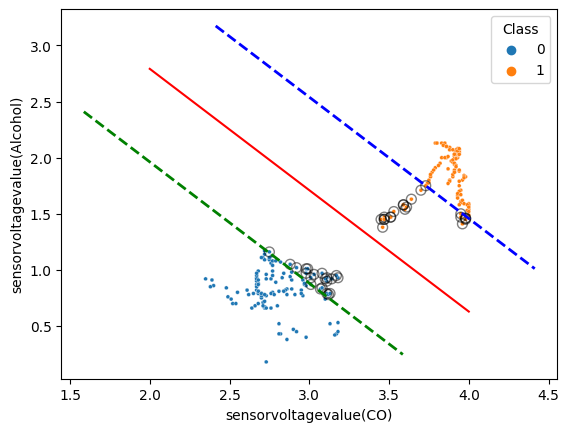

In [ ]:
sns.scatterplot(x=X_train.iloc[:,0],y=X_train.iloc[:,1],hue=Y_train,s=8);
w=svc_model.coef_[0]
b=svc_model.intercept_[0]
x_points=np.linspace(2,4)
y_points=-(w[0]/w[1])*x_points -b/w[1]
plt.plot(x_points,y_points,c='r')
plt.scatter(svc_model.support_vectors_[:,0],svc_model.support_vectors_[:,1],s=50,facecolors='none',edgecolors='k',alpha=0.5);
w_hat = svc_model.coef_[0] / (np.sqrt(np.sum(svc_model.coef_[0] ** 2)))
margin = 1 / np.sqrt(np.sum(svc_model.coef_[0] ** 2))
decision_boundary_points = np.array(list(zip(x_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin
plt.plot(points_of_line_above[:, 0], points_of_line_above[:, 1], 'b--', linewidth=2)
plt.plot(points_of_line_below[:, 0], points_of_line_below[:, 1], 'g--',linewidth=2)